In [24]:
from timeit import default_timer as timer
import tracemalloc

tracemalloc.start()

start = timer()
fullstart = start

def app():
    lt = []
    for i in range(0, 100000):
        lt.append(i)
        
app()

print(tracemalloc.get_traced_memory())
tracemalloc.stop()

end = timer()
print("Total time : %.1f ms" % (1000 * (end - fullstart)))

(3754, 3597912)
Total time : 38.8 ms


# Curve Fitting with Bayesian Ridge Regression

In [159]:
from timeit import default_timer as timer
import tracemalloc

import numpy as np
from datetime import datetime
from sklearn.linear_model import BayesianRidge
import matplotlib.pyplot as plt

def app():

    def func(x):
        return np.sin(2 * np.pi * x)

    size = 25
    rng = np.random.RandomState(round(datetime.now().timestamp()))
    x_train = rng.uniform(0.0, 1.0, size)
    y_train = func(x_train) + rng.normal(scale=0.1, size=size)
    x_test = np.linspace(0.0, 1.0, 100)

    n_order = 3
    X_train = np.vander(x_train, n_order + 1, increasing=True)
    X_test = np.vander(x_test, n_order + 1, increasing=True)
    reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

    # fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    accurate_points = 0
    total_points = 0

    for i, ax in enumerate(axes):
        # Bayesian ridge regression with different initial value pairs
        if i == 0:
            init = [1 / np.var(y_train), 1.0]  # Default values
        elif i == 1:
            init = [1.0, 1e-3]
            reg.set_params(alpha_init=init[0], lambda_init=init[1])

        reg.fit(X_train, y_train)
        ymean, ystd = reg.predict(X_test, return_std=True)

#         ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
#         ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
#         ax.plot(x_test, ymean, color="red", label="predict mean")
#         ax.fill_between(
#             x_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std"
#         )
#         ax.set_ylim(-1.3, 1.3)
#         ax.legend()
#         title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
#         if i == 0:
#             title += " (Default)"
#         ax.set_title(title, fontsize=12)

        # Check if predicted points fall within predicted standard deviation range
        for j, y in enumerate(ymean):
            if y - ystd[j] <= func(x_test[j]) <= y + ystd[j]:
                accurate_points += 1
            total_points += 1

    accuracy = accurate_points / total_points
#     print(f"Accuracy: {accuracy:.3f}")

#     plt.tight_layout()
#     plt.show()

    return accuracy
    
sci_avg_time = 0
sci_avg_mem = [0, 0]
sci_avg_acc = 0

runs = 100000

for i in range(runs):
    tracemalloc.start()
    start = timer()
    fullstart = start
    
    sci_avg_acc += app()
    
    temp = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    end = timer()
    
    sci_avg_time += (end - fullstart)
    sci_avg_mem[0] += temp[0]
    sci_avg_mem[1] += temp[1]

sci_avg_time /= runs
sci_avg_mem[0] /= runs
sci_avg_mem[1] /= runs
sci_avg_acc /= runs

print(f'average accuracy : {sci_avg_acc}')
print(f'average memory usage : {sci_avg_mem}')
print("Average time : %.1f ms" % (1000 * (sci_avg_time)))

average accuracy : 0.7617312999999071
average memory usage : [1294.10968, 22846.16856]
Average time : 4.5 ms


In [164]:
from timeit import default_timer as timer
import tracemalloc

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


def app():

    # func
    def func(x):
        return np.sin(2 * np.pi * x)

    # setup
    size = 25

    rng = np.random.RandomState(round(datetime.now().timestamp()))

    x_train = rng.uniform(0.0, 1.0, size)
    y_train = func(x_train) + rng.normal(scale=0.1, size=size)
    x_test = np.linspace(0.0, 1.0, 100)

    n_order = 3
    coeffs = np.polyfit(x_train, y_train, n_order)

    # predict
    ymean = np.polyval(coeffs, x_test)
    y_std = np.std(y_train - np.polyval(coeffs, x_train))
    ystd = y_std * np.sqrt(1 + 1/size + (x_test - np.mean(x_train))**2 / np.sum((x_train - np.mean(x_train))**2))
    accuracy = np.mean(np.abs(func(x_test) - ymean) < ystd)

    # print(f"Accuracy: {accuracy:.3f}")

    # plot
    # fig, axes = plt.subplots(1, 2, figsize=(8, 4))

#     for i, ax in enumerate(axes):
#         ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
#         ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
#         ax.plot(x_test, ymean, color="red", label="predict mean")
#         ax.fill_between(x_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std")
#         ax.set_ylim(-1.3, 1.3)
#         ax.legend()
#         title = "Degree-{} polynomial".format(n_order)
#         if i == 0:
#             title += " (Training set)"
#         else:
#             title += " (Test set)"
#         ax.set_title(title, fontsize=12)

#     plt.tight_layout()
#     plt.show()

    return accuracy

        
np_avg_time = 0
np_avg_mem = [0, 0]
np_avg_acc = 0

runs = 100000

for i in range(runs):
    tracemalloc.start()
    start = timer()
    fullstart = start
    
    np_avg_acc += app()
    
    temp = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    end = timer()
    
    np_avg_time += (end - fullstart)
    np_avg_mem[0] += temp[0]
    np_avg_mem[1] += temp[1]

np_avg_time /= runs
np_avg_mem[0] /= runs
np_avg_mem[1] /= runs
np_avg_acc /= runs

print(f'average accuracy : {np_avg_acc}')
print(f'average memory usage : {np_avg_mem}')
print("Average time : %.1f ms" % (1000 * (np_avg_time)))


average accuracy : 0.8129321000000155
average memory usage : [407.63824, 9248.07889]
Average time : 0.9 ms


In [165]:
print('accuracy dif sci - np', sci_avg_acc - np_avg_acc)
print('memory dif sci - np current :', sci_avg_mem[0] - np_avg_mem[0], 'peak :', sci_avg_mem[1] - np_avg_mem[1])
print('time dif sci - np', sci_avg_time - np_avg_time)

accuracy dif sci - np -0.051200800000108404
memory dif sci - np current : 886.47144 peak : 13598.089669999998
time dif sci - np 0.0036164770346027216


Accuracy: 0.750


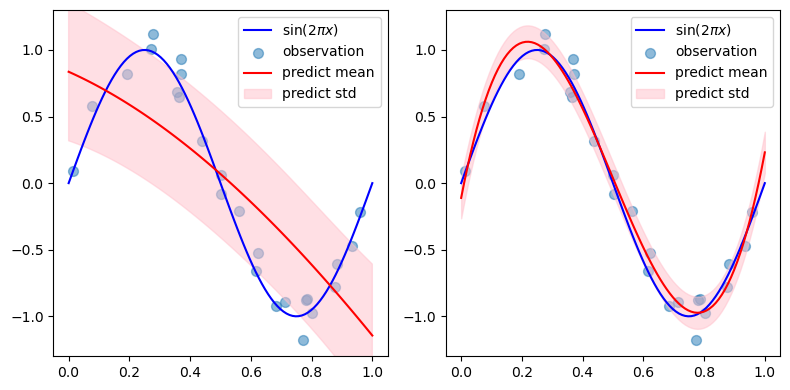

In [176]:
def func(x):
        return np.sin(2 * np.pi * x)

size = 25
# rng = np.random.RandomState(round(datetime.now().timestamp()))
rng = np.random.RandomState(1234)
x_train = rng.uniform(0.0, 1.0, size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0.0, 1.0, 100)

n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

accurate_points = 0
total_points = 0

for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.0]  # Default values
    elif i == 1:
        init = [1.0, 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])

    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)

    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(
        x_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std"
    )
    ax.set_ylim(-1.3, 1.3)
    ax.legend()

    # Check if predicted points fall within predicted standard deviation range
    for j, y in enumerate(ymean):
        if y - ystd[j] <= func(x_test[j]) <= y + ystd[j]:
            accurate_points += 1
        total_points += 1

accuracy = accurate_points / total_points
print(f"Accuracy: {accuracy:.3f}")

plt.tight_layout()
plt.show()

Accuracy: 0.770


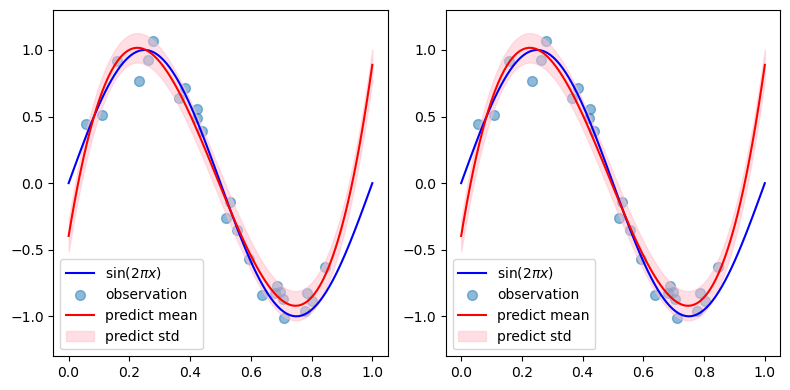

In [171]:
import numpy as np
import matplotlib.pyplot as plt

# func
def func(x):
    return np.sin(2 * np.pi * x)

# setup
size = 25

from datetime import datetime

rng = np.random.RandomState(round(datetime.now().timestamp()))

x_train = rng.uniform(0.0, 1.0, size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0.0, 1.0, 100)

n_order = 3
coeffs = np.polyfit(x_train, y_train, n_order)

# predict
ymean = np.polyval(coeffs, x_test)
y_std = np.std(y_train - np.polyval(coeffs, x_train))
ystd = y_std * np.sqrt(1 + 1/size + (x_test - np.mean(x_train))**2 / np.sum((x_train - np.mean(x_train))**2))
accuracy = np.mean(np.abs(func(x_test) - ymean) < ystd)

print(f"Accuracy: {accuracy:.3f}")

# plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for i, ax in enumerate(axes):
    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(x_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std")
    ax.set_ylim(-1.3, 1.3)
    ax.legend()

plt.tight_layout()
plt.show()
